In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score

In [2]:
df = pd.read_csv('predictions.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,data es,ID TRACK,DATA NASCITA,image_id,covid,rx,CLINICA,NOTE,...,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,0,0,23/03/2020,9.003902e+09,01/03/1946,corda1,0.0,0.0,0.0,NaN,...,0.080021,0.002013,0.057013,0.039196,0.025258,0.035283,0.074448,0.061089,0.078508,0.048945
1,1,1,NaN,9.001680e+09,04/04/1968,corda2,0.0,1.0,0.0,NaN,...,0.031187,0.930774,0.350397,0.184001,0.144656,0.009302,0.758117,0.005987,0.013088,0.059794
2,2,2,NaN,9.003353e+09,12/09/0199,corda3,0.0,0.0,0.0,NaN,...,0.036552,0.003615,0.030241,0.018732,0.006805,0.261099,0.054235,0.026397,0.020180,0.091661
3,3,3,NaN,9.000477e+09,28/05/1946,corda4,1.0,1.0,1.0,NaN,...,0.063948,0.448018,0.187096,0.298485,0.056434,0.030715,0.036530,0.027439,0.093709,0.029209
4,4,4,NaN,9.000981e+09,10/04/1957,corda5,1.0,1.0,1.0,NaN,...,0.135531,0.265945,0.265859,0.226268,0.292798,0.111357,0.197117,0.042322,0.082476,0.047800


In [3]:
df = df[df.dataset == 'CORDA-dataset'].copy()

In [4]:
df.groupby('dataset').count()

,Unnamed: 0,Unnamed: 0.1,data es,ID TRACK,DATA NASCITA,image_id,covid,rx,CLINICA,NOTE,...,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
dataset,,,,,,,,,,,,,,,,,,,,,
CORDA-dataset,447,447,17,447,447,447,447,447,447,135,...,447,447,447,447,447,447,447,447,447,447


In [5]:
df.groupby('rx').count()

,Unnamed: 0,Unnamed: 0.1,data es,ID TRACK,DATA NASCITA,image_id,covid,CLINICA,NOTE,dataset,...,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
rx,,,,,,,,,,,,,,,,,,,,,
0.0,198,198,9,198,198,198,198,198,43,198,...,198,198,198,198,198,198,198,198,198,198
1.0,249,249,8,249,249,249,249,249,92,249,...,249,249,249,249,249,249,249,249,249,249


In [6]:
classes = [
    'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity',
    'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
    'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture',
    'Support Devices'
]
val_classes = ['No Finding', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion']

df[[*classes, 'covid', 'rx', 'CLINICA']].corr()

,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,covid,rx,CLINICA
No Finding,1.000000,-0.136742,-0.445735,-0.899130,-0.331294,-0.680895,-0.835388,-0.689813,-0.540793,0.065305,-0.593863,0.290473,0.318004,-0.321832,-0.332273,-0.615599,-0.298985
Enlarged Cardiomediastinum,-0.136742,1.000000,0.341358,-0.010113,0.118687,0.089084,-0.047904,-0.091178,0.166590,-0.143359,-0.028625,0.007736,0.262864,-0.216359,0.017157,0.089657,-0.014301
Cardiomegaly,-0.445735,0.341358,1.000000,0.281013,-0.131975,0.622757,0.204744,0.181882,0.232167,-0.341792,0.194460,-0.317668,-0.243591,-0.087137,0.030188,0.222584,0.038983
Lung Opacity,-0.899130,-0.010113,0.281013,1.000000,0.358650,0.705666,0.905047,0.839520,0.309188,-0.047059,0.516295,-0.329125,-0.452970,0.437516,0.340364,0.604547,0.317907
Lung Lesion,-0.331294,0.118687,-0.131975,0.358650,1.000000,-0.058354,0.436690,0.525971,-0.055749,0.054243,-0.003706,0.285206,0.168896,-0.053227,0.204380,0.276772,0.156587
Edema,-0.680895,0.089084,0.622757,0.705666,-0.058354,1.000000,0.541494,0.569381,0.214032,-0.306928,0.399091,-0.421607,-0.467326,0.255867,0.214347,0.451295,0.214701
Consolidation,-0.835388,-0.047904,0.204744,0.905047,0.436690,0.541494,1.000000,0.818624,0.337711,-0.089819,0.555135,-0.325222,-0.438147,0.371712,0.281840,0.558248,0.253863
Pneumonia,-0.689813,-0.091178,0.181882,0.839520,0.525971,0.569381,0.818624,1.000000,0.047148,-0.218724,0.178463,-0.223299,-0.349257,0.232634,0.293369,0.501363,0.270265
Atelectasis,-0.540793,0.166590,0.232167,0.309188,-0.055749,0.214032,0.337711,0.047148,1.000000,-0.083024,0.446481,-0.257815,-0.010029,0.033967,0.122643,0.277141,0.094480
Pneumothorax,0.065305,-0.143359,-0.341792,-0.047059,0.054243,-0.306928,-0.089819,-0.218724,-0.083024,1.000000,0.010312,0.044571,-0.018709,0.154384,0.059064,-0.022847,0.042597


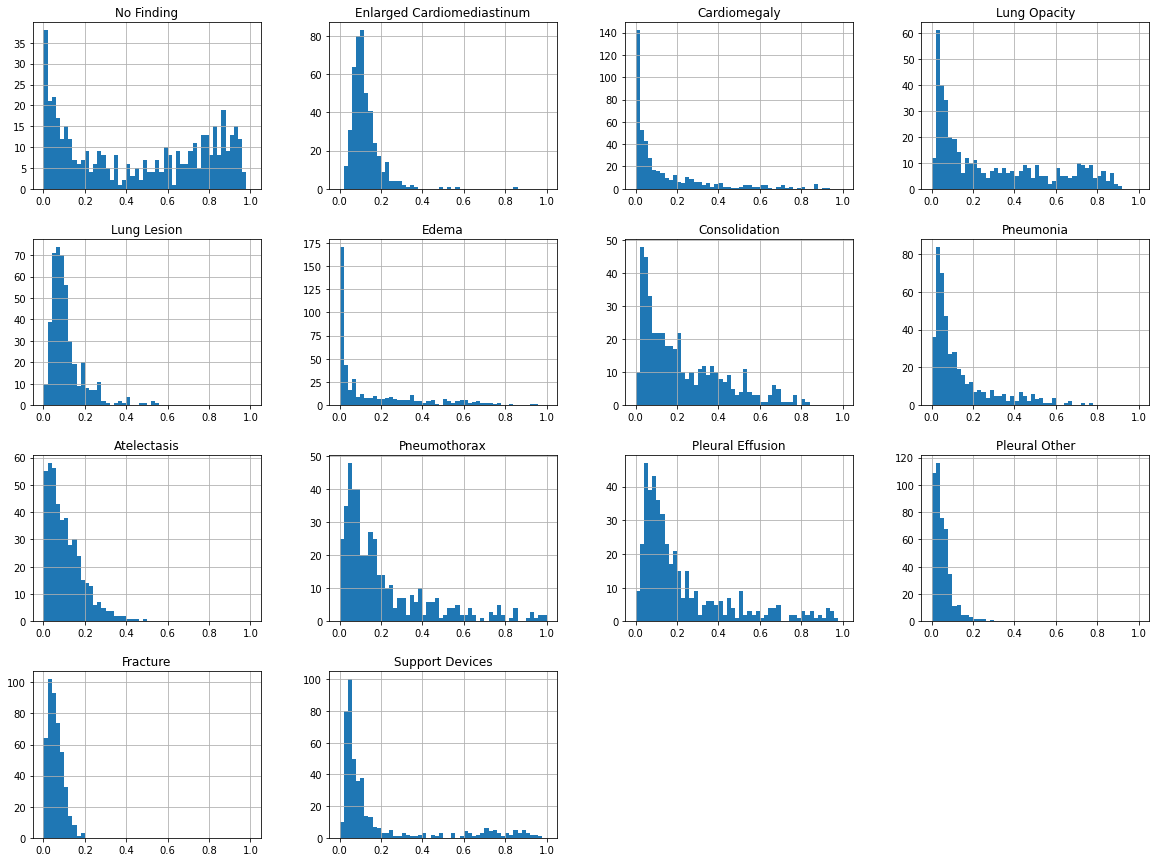

In [7]:
df[classes].hist(figsize=(20, 15), bins=50, range=(0,1))
plt.show()

<AxesSubplot:>

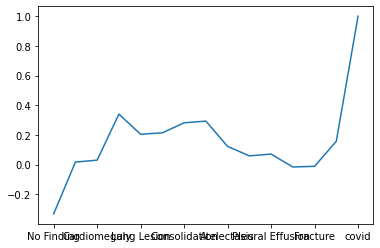

In [8]:
covid_corr = df[[*classes, 'covid']].corr().loc['covid', :]
covid_corr.plot()

In [9]:
classes

['No Finding',
 'Enlarged Cardiomediastinum',
 'Cardiomegaly',
 'Lung Opacity',
 'Lung Lesion',
 'Edema',
 'Consolidation',
 'Pneumonia',
 'Atelectasis',
 'Pneumothorax',
 'Pleural Effusion',
 'Pleural Other',
 'Fracture',
 'Support Devices']

In [10]:
index = [*classes, 'covid', 'rx'] #, 'CLINICA']

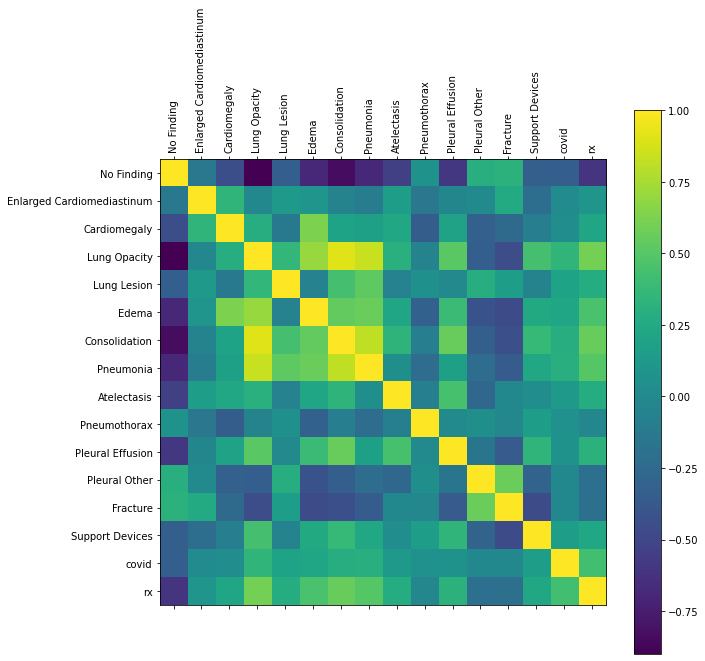

In [11]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(df[index].corr())
fig.colorbar(cax)

ax.set_xticks(range(len(index)))
ax.set_yticks(range(len(index)))
ax.set_xticklabels(index, rotation='vertical')
ax.set_yticklabels(index)
plt.show()

In [12]:
df.iloc[:, 12:]

,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,0.872418,0.077172,0.010822,0.039960,0.080021,0.002013,0.057013,0.039196,0.025258,0.035283,0.074448,0.061089,0.078508,0.048945
1,0.006387,0.130256,0.861003,0.484288,0.031187,0.930774,0.350397,0.184001,0.144656,0.009302,0.758117,0.005987,0.013088,0.059794
2,0.957775,0.060137,0.029840,0.019996,0.036552,0.003615,0.030241,0.018732,0.006805,0.261099,0.054235,0.026397,0.020180,0.091661
3,0.179418,0.112782,0.205861,0.359551,0.063948,0.448018,0.187096,0.298485,0.056434,0.030715,0.036530,0.027439,0.093709,0.029209
4,0.061596,0.100192,0.068573,0.496562,0.135531,0.265945,0.265859,0.226268,0.292798,0.111357,0.197117,0.042322,0.082476,0.047800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,0.002730,0.084995,0.814987,0.642096,0.028012,0.951643,0.205296,0.192721,0.071620,0.005308,0.825061,0.005452,0.005476,0.304919
443,0.339105,0.051394,0.011973,0.396348,0.043572,0.356680,0.268396,0.138872,0.106578,0.097473,0.240197,0.018597,0.039479,0.748487
444,0.022768,0.079083,0.248876,0.873053,0.176306,0.411610,0.531252,0.679463,0.035929,0.085284,0.109297,0.070532,0.016029,0.089341
445,0.015286,0.221574,0.532350,0.821619,0.102327,0.733764,0.511534,0.279175,0.077693,0.058971,0.693585,0.028290,0.009405,0.121630


# RX+ vs RX- on CORDA (Molinette)

In [13]:
molinette_df = df[df.dataset == 'CORDA-dataset']

In [14]:
roc_auc_score(molinette_df.rx.values, 1-molinette_df.iloc[:, 12].values)

0.8560098981785729

In [15]:
predicted_normal = (np.argmax(molinette_df.iloc[:, 12:].values, axis=1) > 0).astype('int')

In [16]:
cm = confusion_matrix(molinette_df.rx.values, predicted_normal)
cm

array([[156,  42],
       [ 63, 186]])

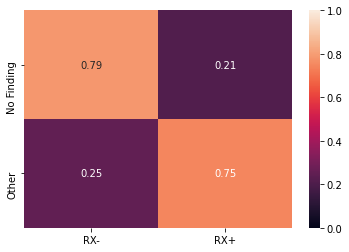

In [17]:
xlabels = ['RX-', 'RX+']
ylabels = ['No Finding', 'Other']
ax = sns.heatmap(
    cm / cm.sum(axis=1)[:, np.newaxis], annot=True, fmt=".2f",
    xticklabels=xlabels, yticklabels=ylabels,
    vmin=0., vmax=1.
)

In [18]:
predicted_normal = (molinette_df.iloc[:, 12].values <= 0.5).astype('int')
cm = confusion_matrix(molinette_df.rx.values, predicted_normal)
cm

array([[155,  43],
       [ 58, 191]])

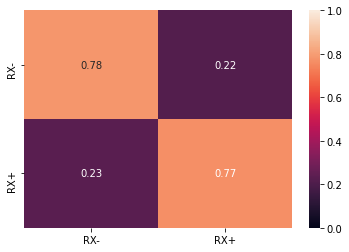

In [19]:
labels = ['RX-', 'RX+']
ax = sns.heatmap(
    cm / cm.sum(axis=1)[:, np.newaxis], annot=True, fmt=".2f",
    xticklabels=labels, yticklabels=labels,
    vmin=0., vmax=1.
)

In [20]:
df.head()

,Unnamed: 0,Unnamed: 0.1,data es,ID TRACK,DATA NASCITA,image_id,covid,rx,CLINICA,NOTE,...,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,0,0,23/03/2020,9.003902e+09,01/03/1946,corda1,0.0,0.0,0.0,NaN,...,0.080021,0.002013,0.057013,0.039196,0.025258,0.035283,0.074448,0.061089,0.078508,0.048945
1,1,1,NaN,9.001680e+09,04/04/1968,corda2,0.0,1.0,0.0,NaN,...,0.031187,0.930774,0.350397,0.184001,0.144656,0.009302,0.758117,0.005987,0.013088,0.059794
2,2,2,NaN,9.003353e+09,12/09/0199,corda3,0.0,0.0,0.0,NaN,...,0.036552,0.003615,0.030241,0.018732,0.006805,0.261099,0.054235,0.026397,0.020180,0.091661
3,3,3,NaN,9.000477e+09,28/05/1946,corda4,1.0,1.0,1.0,NaN,...,0.063948,0.448018,0.187096,0.298485,0.056434,0.030715,0.036530,0.027439,0.093709,0.029209
4,4,4,NaN,9.000981e+09,10/04/1957,corda5,1.0,1.0,1.0,NaN,...,0.135531,0.265945,0.265859,0.226268,0.292798,0.111357,0.197117,0.042322,0.082476,0.047800


# Visualizations

In [21]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [22]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df.iloc[:, 12:])
pca.explained_variance_ratio_.sum()

0.703988685037822

In [23]:
pca_df = df[['dataset', 'covid', 'rx']].copy()
print(pca_df.shape)
for i in range(pca_components.shape[1]):
    pca_df[f'pca_comp{i}'] = pca_components[:, i]
pca_df.head()

(447, 3)


,dataset,covid,rx,pca_comp0,pca_comp1
0,CORDA-dataset,0.0,0.0,-0.591973,-0.102283
1,CORDA-dataset,0.0,1.0,0.887707,-0.641959
2,CORDA-dataset,0.0,0.0,-0.671364,0.045775
3,CORDA-dataset,1.0,1.0,0.236226,-0.349480
4,CORDA-dataset,1.0,1.0,0.370901,-0.152383


Text(0.5, 1.05, 'PCA (2-comp)')

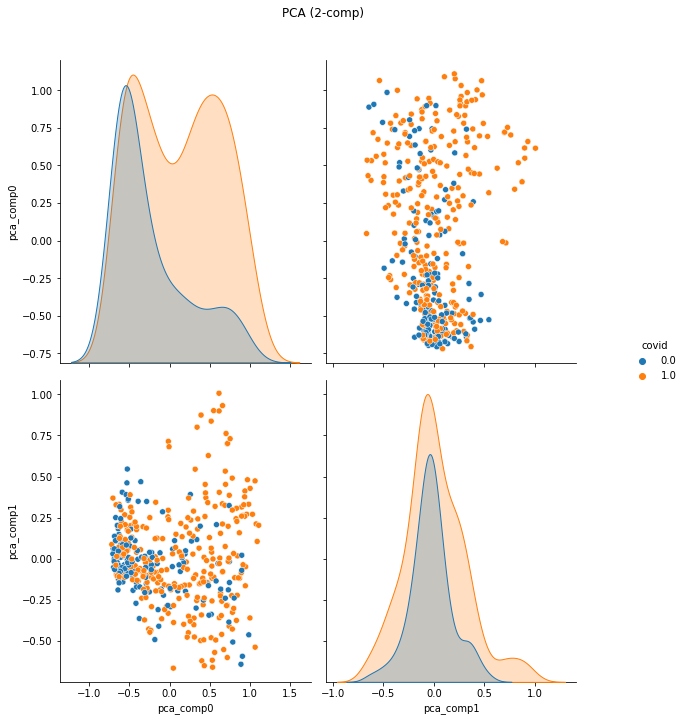

In [24]:
g = sns.pairplot(pca_df.drop(['rx', 'dataset'], axis=1), hue='covid')
g.fig.set_size_inches(10, 10)
g.fig.suptitle(f'PCA (2-comp)', y=1.05)

In [25]:
tsne = TSNE(n_components=2, perplexity=100, n_iter=1000)
embedded = tsne.fit_transform(df.iloc[:, 12:])

In [26]:
tsne_df = df[['dataset', 'covid', 'rx']].copy()
for i in range(embedded.shape[1]):
    tsne_df[f'tsne_comp{i}'] = embedded[:, i]
tsne_df.head()

,dataset,covid,rx,tsne_comp0,tsne_comp1
0,CORDA-dataset,0.0,0.0,5.256965,-4.364223
1,CORDA-dataset,0.0,1.0,-2.785978,8.787773
2,CORDA-dataset,0.0,0.0,4.811397,-6.804569
3,CORDA-dataset,1.0,1.0,-1.038612,4.131247
4,CORDA-dataset,1.0,1.0,-2.061280,3.715339


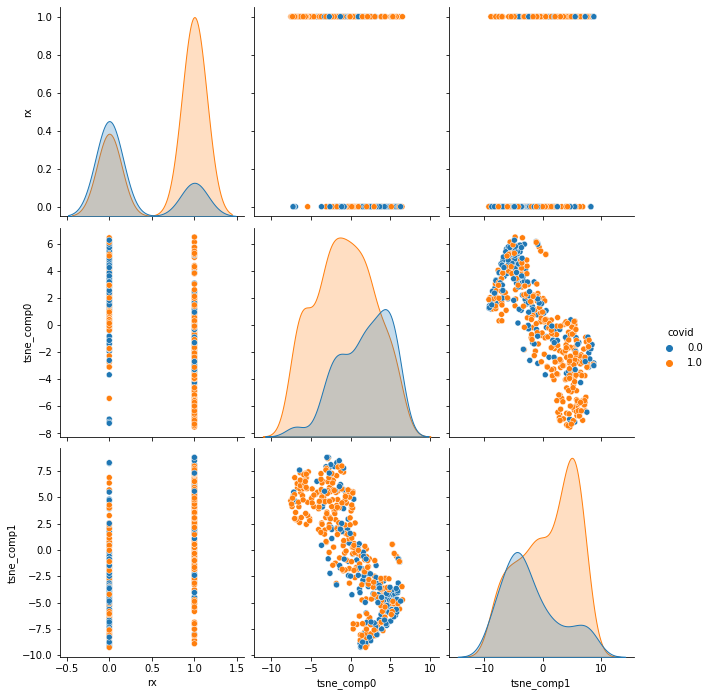

In [27]:
g = sns.pairplot(tsne_df, hue='covid')
g.fig.set_size_inches(10, 10)

# Covid prediction from radiological findings

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [29]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'data es', 'ID TRACK', 'DATA NASCITA',
       'image_id', 'covid', 'rx', 'CLINICA', 'NOTE', 'dataset', 'view',
       'No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia',
       'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other',
       'Fracture', 'Support Devices'],
      dtype='object')

In [30]:
train_df = df[df.dataset == 'CORDA-dataset'].copy()

In [31]:
len(train_df)

447

In [32]:
train_df.head()

,Unnamed: 0,Unnamed: 0.1,data es,ID TRACK,DATA NASCITA,image_id,covid,rx,CLINICA,NOTE,...,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,0,0,23/03/2020,9.003902e+09,01/03/1946,corda1,0.0,0.0,0.0,NaN,...,0.080021,0.002013,0.057013,0.039196,0.025258,0.035283,0.074448,0.061089,0.078508,0.048945
1,1,1,NaN,9.001680e+09,04/04/1968,corda2,0.0,1.0,0.0,NaN,...,0.031187,0.930774,0.350397,0.184001,0.144656,0.009302,0.758117,0.005987,0.013088,0.059794
2,2,2,NaN,9.003353e+09,12/09/0199,corda3,0.0,0.0,0.0,NaN,...,0.036552,0.003615,0.030241,0.018732,0.006805,0.261099,0.054235,0.026397,0.020180,0.091661
3,3,3,NaN,9.000477e+09,28/05/1946,corda4,1.0,1.0,1.0,NaN,...,0.063948,0.448018,0.187096,0.298485,0.056434,0.030715,0.036530,0.027439,0.093709,0.029209
4,4,4,NaN,9.000981e+09,10/04/1957,corda5,1.0,1.0,1.0,NaN,...,0.135531,0.265945,0.265859,0.226268,0.292798,0.111357,0.197117,0.042322,0.082476,0.047800


In [33]:
train_df, test_df = train_test_split(train_df, test_size=0.3, random_state=42, stratify=train_df.covid)

In [34]:
test_df.head(n=20)

,Unnamed: 0,Unnamed: 0.1,data es,ID TRACK,DATA NASCITA,image_id,covid,rx,CLINICA,NOTE,...,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
316,316,15,NaN,9.003901e+09,21/01/1959,borda16,0.0,0.0,0.0,NaN,...,0.106938,0.008967,0.203726,0.081905,0.092515,0.266311,0.248240,0.100553,0.050994,0.035300
350,350,55,NaN,9.000970e+09,01/04/1923,borda54,1.0,1.0,1.0,NaN,...,0.254394,0.171296,0.674627,0.265448,0.098607,0.245364,0.333252,0.044471,0.017755,0.453705
210,210,239,NaN,9.000713e+09,29/06/1962,corda234,0.0,0.0,0.0,NaN,...,0.128189,0.006237,0.048474,0.051157,0.016407,0.083171,0.053604,0.133908,0.078491,0.049397
446,446,161,NaN,9.001387e+09,14/11/1944,borda157,0.0,1.0,1.0,comorbilita',...,0.174199,0.457557,0.552521,0.169278,0.163936,0.115372,0.681655,0.016696,0.026880,0.098483
71,71,85,20/03/2020,9.004187e+09,20/02/1992,corda83,1.0,0.0,1.0,NaN,...,0.109971,0.018418,0.088666,0.055536,0.090340,0.568278,0.125891,0.058869,0.070843,0.047627
225,225,255,NaN,9.004080e+09,01/03/1967,corda249,1.0,0.0,1.0,NaN,...,0.096386,0.009374,0.153679,0.060142,0.420276,0.591948,0.285536,0.043923,0.074513,0.104268
416,416,126,NaN,9.004009e+09,21/11/1993,borda123,1.0,0.0,1.0,operatore sanitario,...,0.045381,0.003360,0.025971,0.020074,0.010246,0.180533,0.045105,0.064096,0.040790,0.102560
291,291,335,NaN,9.000628e+09,30/08/1970,corda327,0.0,0.0,0.0,NaN,...,0.117816,0.026619,0.201703,0.114311,0.182916,0.137782,0.453120,0.103603,0.081952,0.022225
262,262,301,NaN,9.000274e+09,08/06/1952,corda294,1.0,1.0,1.0,NaN,...,0.060750,0.426791,0.287538,0.191276,0.362595,0.060158,0.082688,0.012249,0.042295,0.060549
223,223,253,NaN,9.001367e+09,30/09/1982,corda247,1.0,0.0,1.0,tc neg,...,0.065714,0.008896,0.041176,0.020002,0.021574,0.358133,0.103004,0.026893,0.042233,0.064981


In [35]:
train_df.groupby('covid').count()

,Unnamed: 0,Unnamed: 0.1,data es,ID TRACK,DATA NASCITA,image_id,rx,CLINICA,NOTE,dataset,...,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
covid,,,,,,,,,,,,,,,,,,,,,
0.0,105,105,7,105,105,105,105,105,25,105,...,105,105,105,105,105,105,105,105,105,105
1.0,207,207,4,207,207,207,207,207,55,207,...,207,207,207,207,207,207,207,207,207,207


In [36]:
#train_df = pd.concat((
#    train_df[train_df.covid == 0].sample(n=105, random_state=42),
#    train_df[train_df.covid == 1].sample(n=105, random_state=42)
#))

In [37]:
train_df.groupby('covid').count()

,Unnamed: 0,Unnamed: 0.1,data es,ID TRACK,DATA NASCITA,image_id,rx,CLINICA,NOTE,dataset,...,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
covid,,,,,,,,,,,,,,,,,,,,,
0.0,105,105,7,105,105,105,105,105,25,105,...,105,105,105,105,105,105,105,105,105,105
1.0,207,207,4,207,207,207,207,207,55,207,...,207,207,207,207,207,207,207,207,207,207


In [38]:
train_X, train_Y = train_df[classes], train_df.covid
test_X, test_Y = test_df[classes], test_df.covid

In [39]:
tree_model = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_split=10).fit(train_X, train_Y)

from sklearn.metrics import accuracy_score, balanced_accuracy_score

print('acc: ', accuracy_score(test_Y, (tree_model.predict_proba(test_X)[:,1] > 0.5).astype('int')))
print('ba:', balanced_accuracy_score(test_Y, (tree_model.predict_proba(test_X)[:,1] > 0.5).astype('int')))
print('auc:', roc_auc_score(test_Y, tree_model.predict_proba(test_X)[:,1]))

acc:  0.7111111111111111
ba: 0.6833333333333333
auc: 0.6980246913580248


In [40]:
from sklearn.metrics import confusion_matrix

y = tree_model.predict(test_X)
cm = confusion_matrix(test_Y, y)
cm

array([[27, 18],
       [21, 69]])

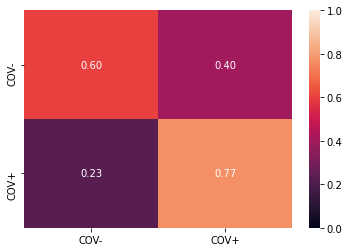

In [41]:
labels = ['COV-', 'COV+']
ax = sns.heatmap(
    cm / cm.sum(axis=1)[:, np.newaxis], annot=True, fmt=".2f",
    xticklabels=labels, yticklabels=labels,
    vmin=0., vmax=1.
)

## Tree - RX+

In [42]:
test_rx_X, test_rx_Y = test_df[test_df.rx == 1][classes], test_df[test_df.rx == 1].covid

In [43]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

print('acc: ', accuracy_score(test_rx_Y, (tree_model.predict_proba(test_rx_X)[:,1] > 0.5).astype('int')))
print('ba:', balanced_accuracy_score(test_rx_Y, (tree_model.predict_proba(test_rx_X)[:,1] > 0.5).astype('int')))
print('auc:', roc_auc_score(test_rx_Y, tree_model.predict_proba(test_rx_X)[:,1]))

acc:  0.7945205479452054
ba: 0.5799120234604105
auc: 0.6209677419354839


In [44]:
y = tree_model.predict(test_rx_X)
cm = confusion_matrix(test_rx_Y, y)
cm

array([[ 3,  8],
       [ 7, 55]])

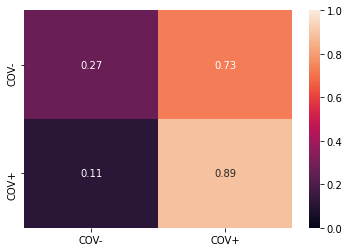

In [45]:
labels = ['COV-', 'COV+']
ax = sns.heatmap(
    cm / cm.sum(axis=1)[:, np.newaxis], annot=True, fmt=".2f",
    xticklabels=labels, yticklabels=labels,
    vmin=0., vmax=1.
)

## Tree - RX-

acc:  0.6129032258064516
ba: 0.6029411764705883
auc: 0.5724789915966386
[[24 10]
 [14 14]]


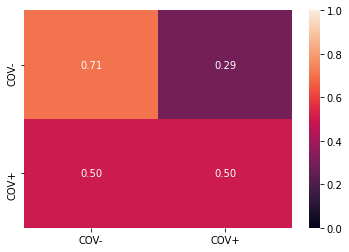

In [48]:
test_rx_X, test_rx_Y = test_df[test_df.rx == 0][classes], test_df[test_df.rx == 0].covid
print('acc: ', accuracy_score(test_rx_Y, (tree_model.predict_proba(test_rx_X)[:,1] > 0.5).astype('int')))
print('ba:', balanced_accuracy_score(test_rx_Y, (tree_model.predict_proba(test_rx_X)[:,1] > 0.5).astype('int')))
print('auc:', roc_auc_score(test_rx_Y, tree_model.predict_proba(test_rx_X)[:,1]))
y = tree_model.predict(test_rx_X)
cm = confusion_matrix(test_rx_Y, y)
print(cm)
labels = ['COV-', 'COV+']
ax = sns.heatmap(
    cm / cm.sum(axis=1)[:, np.newaxis], annot=True, fmt=".2f",
    xticklabels=labels, yticklabels=labels,
    vmin=0., vmax=1.
)

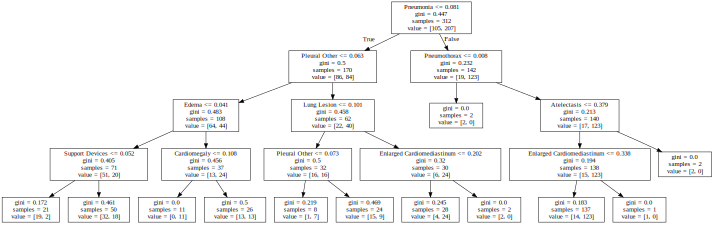

In [55]:
from sklearn import tree
import pydotplus
import graphviz

tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=classes)
pydot_graph = pydotplus.graph_from_dot_data(tree_graph)
pydot_graph.set_size('"10,20!"')

pydot_graph.write_png('tree.png')
pydot_graph.write_pdf('tree.pdf')

gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph